In [136]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt 
import PIL
from PIL import Image
import math
import os
from numpy import linalg as LA


path = '/Users/cooperyoung/Desktop/jupyter/pendulum/'
data = []
shapes = []
epsilon = 10000000
alpha = 1

# creates list of our images (data) 
for file in os.listdir(path):
    if file.endswith(".PNG"):
        # scales then crops images so they're all 700x400
        
        im = Image.open(path + file)
        im.thumbnail((560, 300))
        scaled_im = im.resize((560, 300))
        
        np_im = np.array(scaled_im)
        shapes.append(np_im.shape)
        data.append(np_im.ravel())
        
        
# Create our functions
def k(x, y):
    dist_sq = 0
    for i in range (0, min(len(x), len(y))):
        dist_sq += (float(x[i]) - float(y[i])) ** 2
    return (float(math.exp(- dist_sq/epsilon))) 

# For some reason this way of making a k-value matrix wasn't working
#k_vals = np.fromfunction(lambda i, j: k(data[i], data[j]), (len(data), len(data)), dtype=float)

k_vals = np.zeros((len(data), len(data)))
for i in range(len(data)):
    for j in range(len(data)):
        k_vals[i, j] = k(data[i], data[j])

def q(n):
    sum = 0
    for j in range(0, len(data)):
        sum += k_vals[n][j]
    return(sum)


def w(n, m):
    denom = q(n) ** alpha + q(m) ** alpha
    return(k_vals[n][m]/denom)


# How to turn vector data back into image by recalling its shape
#vector = np.matrix(data[0])
#ar = np.asarray(vector).reshape(shapes[0])
#im = Image.fromarray(ar, 'RGBA')
#im.show()



In [137]:
# Compute our transition matrix
def trans_matrix(n):
    M = np.zeros((len(data), len(data)))
    for i in range(len(data)):
        for j in range(len(data)):
            denom = 0
            for k in range(len(data)):
                denom += w(j, k)
            M[i, j] = w(i,j)/denom
    
    return(M)




0.9423620617069544
[-0.9678895236882956, 0.22970896885534825, -0.014862321257660049, -1.3570064459797768e-06, 5.1870383941549184e-05, 0.00045490316724214715, -7.505513594855044e-05, 8.778429616395166e-07, -1.0399162273164883e-05, 0.0008873012383183329, -0.0003541843649886425, 0.00011322719063796037, -9.691265812178733e-05, 0.0002920098838317724, -1.0753343099871681e-05, -5.618373680165407e-07]
[ 0  2 10 12  6 14  8  3 15  7  4 11 13  5  9  1]


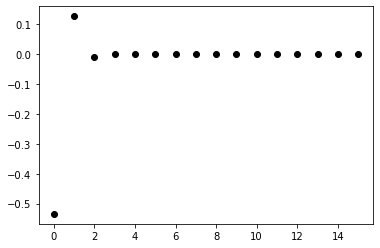

In [150]:
# plots the t-step diffusion map with one dimension (just one eigenvector)

def diffusion(t):
    
    eigen_vals, eigen_vecs = LA.eig(M)
    eigen_vals = eigen_vals.tolist()
    eigen_vecs = eigen_vecs.tolist()

    # Find largest eigenvalue < 1
    max_eigen_val = 0
    for i in range(len(data)):
        if (eigen_vals[i] > max_eigen_val) & (eigen_vals[i] < 1):
            max_eigen_val = eigen_vals[i]
          
    # Find cooresponding eigenvector
    max_eigen_vect = eigen_vecs[eigen_vals.index(max_eigen_val)]
    
    print(max_eigen_val)
    print(max_eigen_vect)
    
    # Embed our points in 1 dimensional space
    for i in range(len(data)):
        plt.plot(i, (max_eigen_val ** t) * max_eigen_vect[i], 'o',color='black')
        
    # Sort data in order
    sort_index = np.argsort(max_eigen_vect) 
    print(sort_index) 
    
    

diffusion(10)
